이번 포스팅에서는 OCR 하면 빼놓을 수 없는.. 역사 깊은 Tesseract OCR 엔진에 대해 다뤄보겠다.

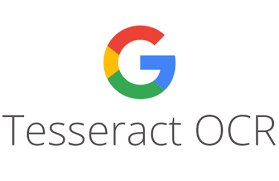


overview논문 : storage.googleapis.com/pub-tools-public-publication-data/pdf/33418.pdf  

main repository : https://www.github.com/tesseract-ocr/tesseract

# Easy OCR

In [1]:
import easyocr
# reader = easyocr.Reader(['ch_sim','en']) # this needs to run only once to load the model into memory
reader = easyocr.Reader(['ko','en'],gpu=False) # this needs to run only once to load the model into memory


/Users/juniverse/opt/anaconda3/envs/veda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/juniverse/opt/anaconda3/envs/veda/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/juniverse/opt/anaconda3/envs/veda/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <870081F6-12FD-3CEA-BC5C-30F4764F2A98> /Users/juniverse/opt/anaconda3/envs/veda/lib/python3.8/site-packages/torchvision/image.so
  Expected in:     <F2FE5CF8-5B5B-3FAD-ADF8-C77D90F49FC9> /Users/juniverse/opt/anaconda3/envs/veda/lib/python3.8/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Othe

In [4]:
result = reader.readtext('scratch.jpg')

result



[([[318, 0], [1181, 0], [1181, 221], [318, 221]],
  'Scratch',
  0.46950101865893124),
 ([[273, 201], [1253, 201], [1253, 421], [273, 421]],
  'IRemovall',
  0.7044786543934106)]

[318, 0] [1181, 221]
Scratch confidence :  0.46950101865893124


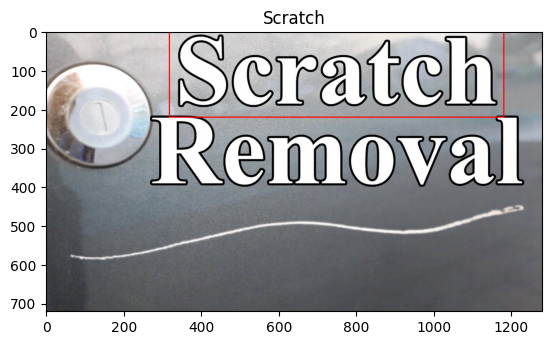

[273, 201] [1253, 421]
IRemovall confidence :  0.7044786543934106


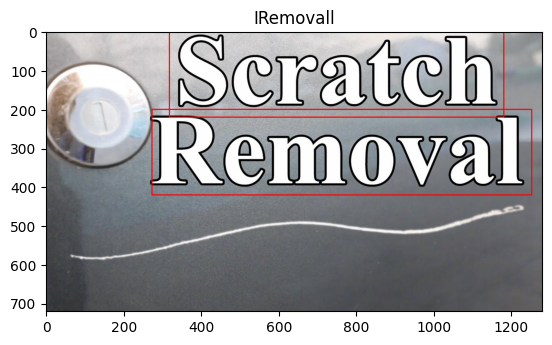

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = 'back.jpg'
path = 'scratch.jpg'
# 이미지 읽기

result = reader.readtext(path)

img = cv2.imread(path)
for box in result:
    start = box[0][0]
    end = box[0][2]
    text = box[1]
    conf = box[2]
    print(start,end)
    print(text,'confidence : ',conf)
    cv2.rectangle(img, start, end, (255, 0, 0), 2) # 색깔, 두께
    # 이미지 출력
    plt.title(text)
    plt.imshow(img)
    plt.show()
